## Imports


In [92]:
import copy
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import torch
import torch.onnx
import torch.nn as nn
import torch.utils.data as data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Data mining

In [93]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=";")


In [94]:
df.shape

(4898, 12)

In [95]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Check if there are any NaN values

In [97]:
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [98]:
fig = px.histogram(df,x='quality')
fig.show()

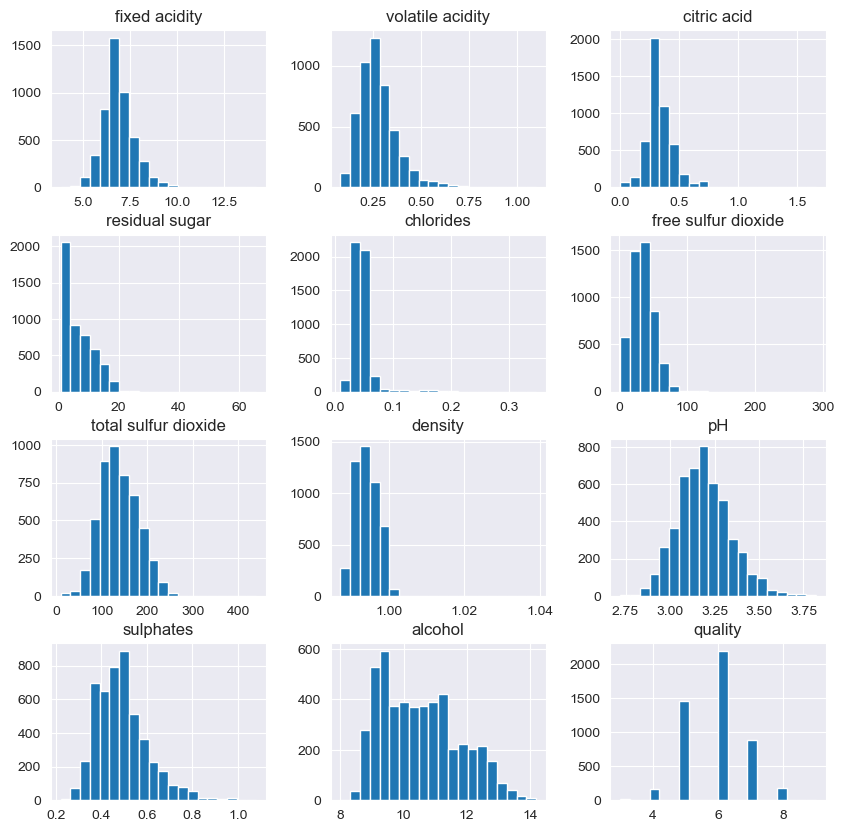

In [99]:

df.hist(bins=20, figsize=(10, 10))
plt.show()

<AxesSubplot:>

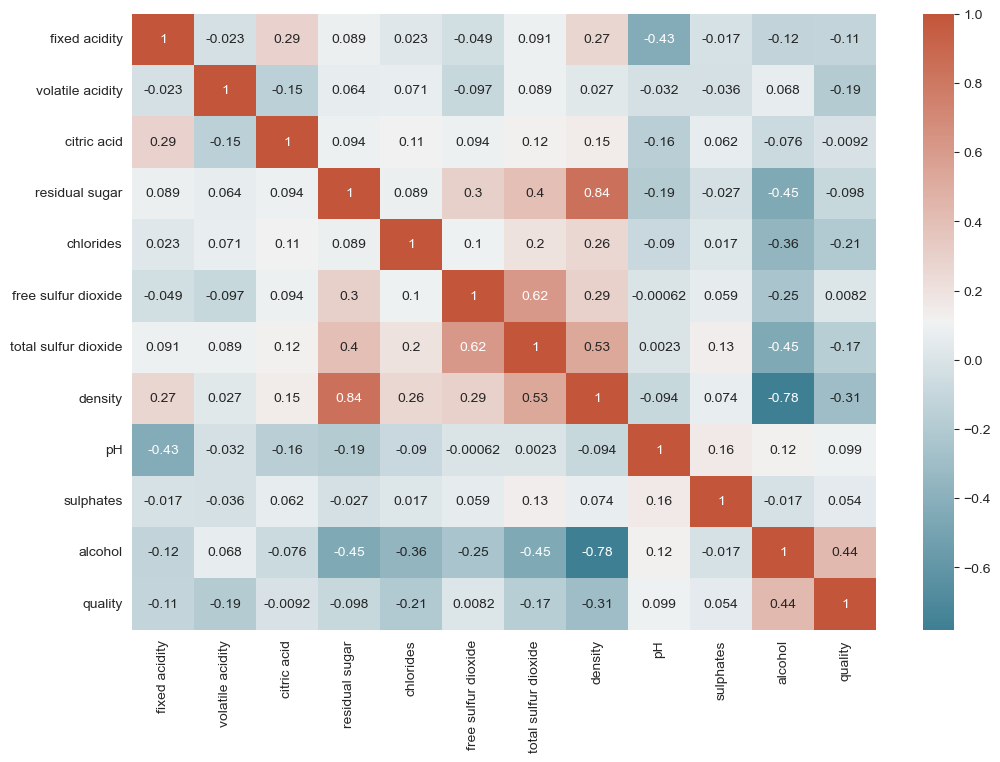

In [100]:
corr = df.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [101]:
# train=df.sample(frac=0.8,random_state=200) #random state is a seed value
# test=df.drop(train.index)
# x_train = train.values[:,:-1]
# y_train = train.values[:,-1]
# x_test = test.values[:,:-1]
# y_test = test.values[:,-1]

In [102]:
x = df.values[:,:-1]
y = df.values[:,-1]
x_norm = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, train_size=0.8, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

# xy = df.to_numpy()
# xy_norm = StandardScaler().fit_transform(xy)
# x= xy_norm[:,:-1]
# y= xy_norm[:,-1]
# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=200)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=200) # 0.25 x 0.8 = 0.2


In [103]:
x_val.shape, y_val.shape

((980, 11), (980,))

In [104]:
y_val.reshape(-1, 1)

array([[6.],
       [5.],
       [8.],
       [6.],
       [7.],
       [5.],
       [5.],
       [5.],
       [6.],
       [6.],
       [5.],
       [6.],
       [5.],
       [6.],
       [7.],
       [5.],
       [6.],
       [6.],
       [6.],
       [6.],
       [7.],
       [6.],
       [5.],
       [6.],
       [5.],
       [7.],
       [6.],
       [6.],
       [6.],
       [5.],
       [7.],
       [5.],
       [6.],
       [6.],
       [5.],
       [4.],
       [7.],
       [5.],
       [6.],
       [5.],
       [5.],
       [6.],
       [6.],
       [9.],
       [7.],
       [6.],
       [7.],
       [6.],
       [5.],
       [6.],
       [8.],
       [6.],
       [6.],
       [6.],
       [6.],
       [4.],
       [8.],
       [5.],
       [7.],
       [5.],
       [7.],
       [6.],
       [6.],
       [8.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [7.],
       [6.],
       [7.],
       [5.],
       [7.],
       [6.],
       [6.],
       [4.],

In [105]:
val = np.concatenate((x_val, y_val.reshape(-1, 1)), axis=1)
pd.DataFrame(val).to_csv("valid.csv", index=False)

In [106]:
train_dataset = data.TensorDataset(torch.from_numpy(x_train),torch.from_numpy(y_train))
train_data_loader = data.DataLoader(train_dataset, batch_size=64, shuffle=True)

In [107]:
test_dataset = data.TensorDataset(torch.from_numpy(x_test),torch.from_numpy(y_test))
test_data_loader = data.DataLoader(test_dataset, batch_size=64, shuffle=True, drop_last=True)

In [108]:
data_loaders = {'train': train_data_loader, 'test':test_data_loader}
data_loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f7ab1b1dcd0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f7ab1b1d5b0>}

In [109]:
class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden1, num_hidden2, num_hidden3, num_outputs):
        super().__init__()
        self.linear1 = nn.Linear(num_inputs, num_hidden1)
        self.activ_func = nn.ReLU()
        self.linear2 = nn.Linear(num_hidden1, num_hidden2)
        self.linear3 = nn.Linear(num_hidden2, num_hidden3)
        self.linear4 = nn.Linear(num_hidden3, num_outputs)

    def forward(self, x):
        x = self.linear1(x)
        x = self.activ_func(x)
        x = self.linear2(x)
        x = self.activ_func(x)
        x = self.linear3(x)
        x = self.activ_func(x)
        x = self.linear4(x)

        return x

In [110]:
def train_model(model, data_loaders, loss_module, optimizer, scheduler, num_epochs=100):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    history = {}
    training_loss, training_acc, test_loss, test_acc = [], [], [], []
    for epoch in range(num_epochs):
        print(f"Epoch {epoch}:")
        for phase in ['train', 'test']:
            if phase =='train':
                model.train()
            else:
                model.eval()
            running_loss = 0.0
            running_corretcs = 0

            for inputs, targets in data_loaders[phase]:
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    predictions = model(inputs.float())
                    predictions = predictions.squeeze(dim=1)
                    loss = loss_module(predictions, targets.float())

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                running_loss += loss.item() * inputs.size(0)
                predictions = torch.round(predictions)
                running_corretcs += torch.sum(predictions == targets)
            # if phase == 'train':
            #     scheduler.step()

            epoch_loss = running_loss / len(data_loaders[phase].dataset)
            epoch_acc = running_corretcs.double() / len(data_loaders[phase].dataset)
            if phase == 'train':
                training_loss.append(epoch_loss)
                training_acc.append(epoch_acc)
            else:
                test_loss.append(epoch_loss)
                test_acc.append(epoch_acc)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc*100:2f} %')
    history.update({'training_loss' : training_loss, 'training_acc': training_acc, 'test_loss' : test_loss, 'test_acc' : test_acc})
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, history

In [111]:
model = SimpleClassifier(num_inputs=11, num_hidden1=128, num_hidden2=64, num_hidden3 =32, num_outputs=1)
optimizer = torch.optim.Adam(model.parameters())
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
loss_module = nn.L1Loss()


In [112]:
_, history = train_model(model, data_loaders, loss_module, optimizer, scheduler, num_epochs=100)

Epoch 0:
train Loss: 3.8029 Acc: 0.0585
test Loss: 1.6203 Acc: 0.2061
Epoch 1:
train Loss: 1.1920 Acc: 0.2686
test Loss: 1.0954 Acc: 0.2888
Epoch 2:
train Loss: 0.9776 Acc: 0.3359
test Loss: 0.9226 Acc: 0.3398
Epoch 3:
train Loss: 0.8275 Acc: 0.3894
test Loss: 0.8122 Acc: 0.3694
Epoch 4:
train Loss: 0.6897 Acc: 0.4592
test Loss: 0.6687 Acc: 0.4531
Epoch 5:
train Loss: 0.6077 Acc: 0.5218
test Loss: 0.6094 Acc: 0.4867
Epoch 6:
train Loss: 0.5758 Acc: 0.5354
test Loss: 0.6373 Acc: 0.4592
Epoch 7:
train Loss: 0.5677 Acc: 0.5517
test Loss: 0.5763 Acc: 0.5061
Epoch 8:
train Loss: 0.5444 Acc: 0.5691
test Loss: 0.5733 Acc: 0.5112
Epoch 9:
train Loss: 0.5399 Acc: 0.5650
test Loss: 0.5645 Acc: 0.5255
Epoch 10:
train Loss: 0.5333 Acc: 0.5633
test Loss: 0.5711 Acc: 0.5102
Epoch 11:
train Loss: 0.5360 Acc: 0.5654
test Loss: 0.5821 Acc: 0.5061
Epoch 12:
train Loss: 0.5359 Acc: 0.5739
test Loss: 0.5655 Acc: 0.5286
Epoch 13:
train Loss: 0.5251 Acc: 0.5830
test Loss: 0.5512 Acc: 0.5255
Epoch 14:
train 

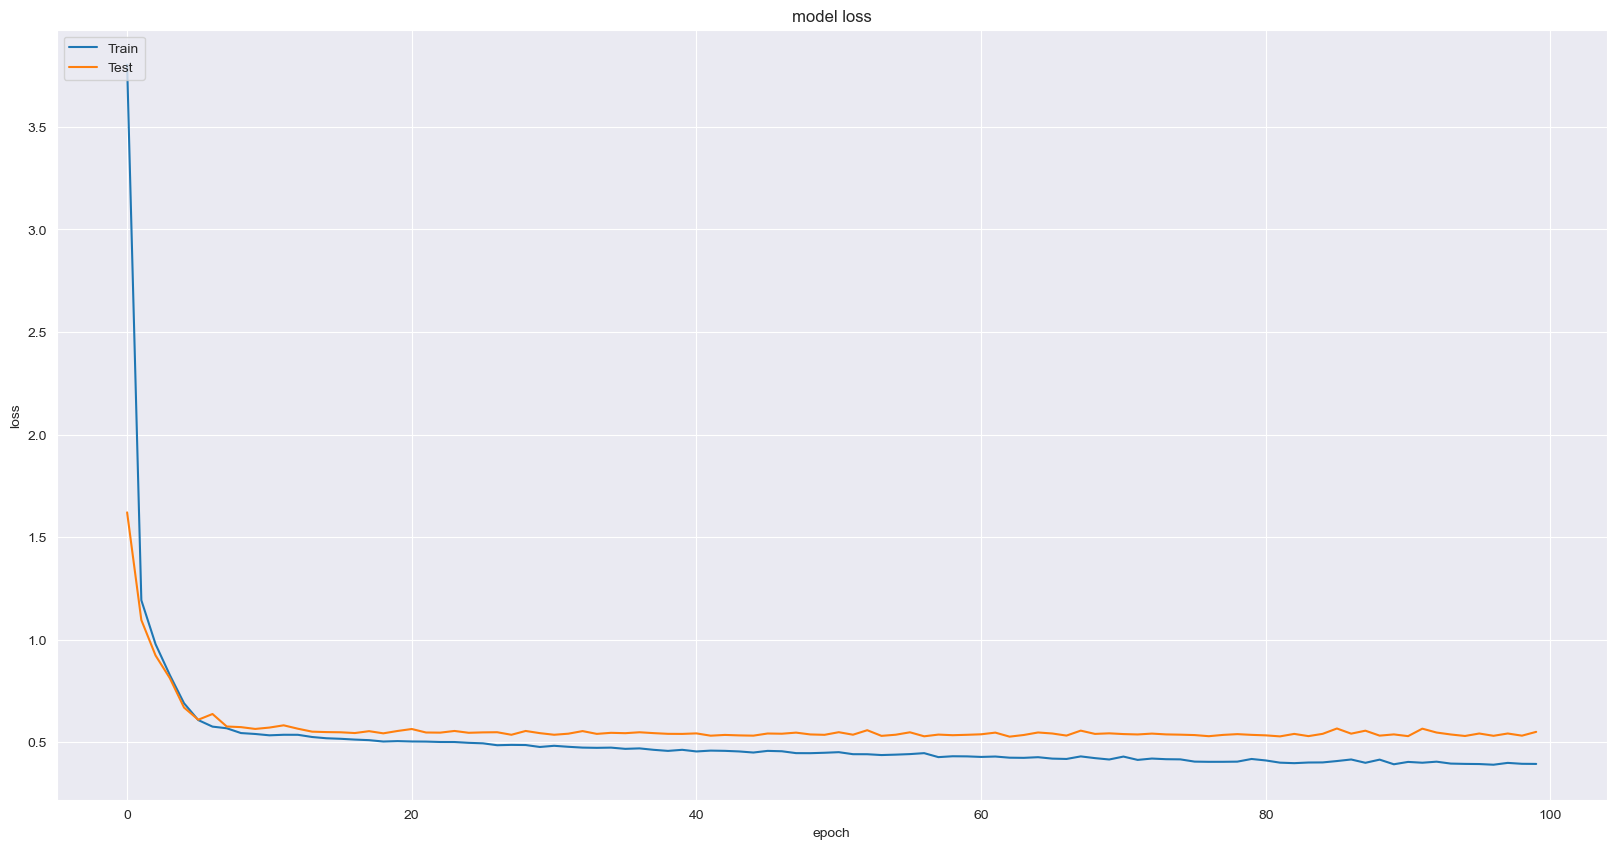

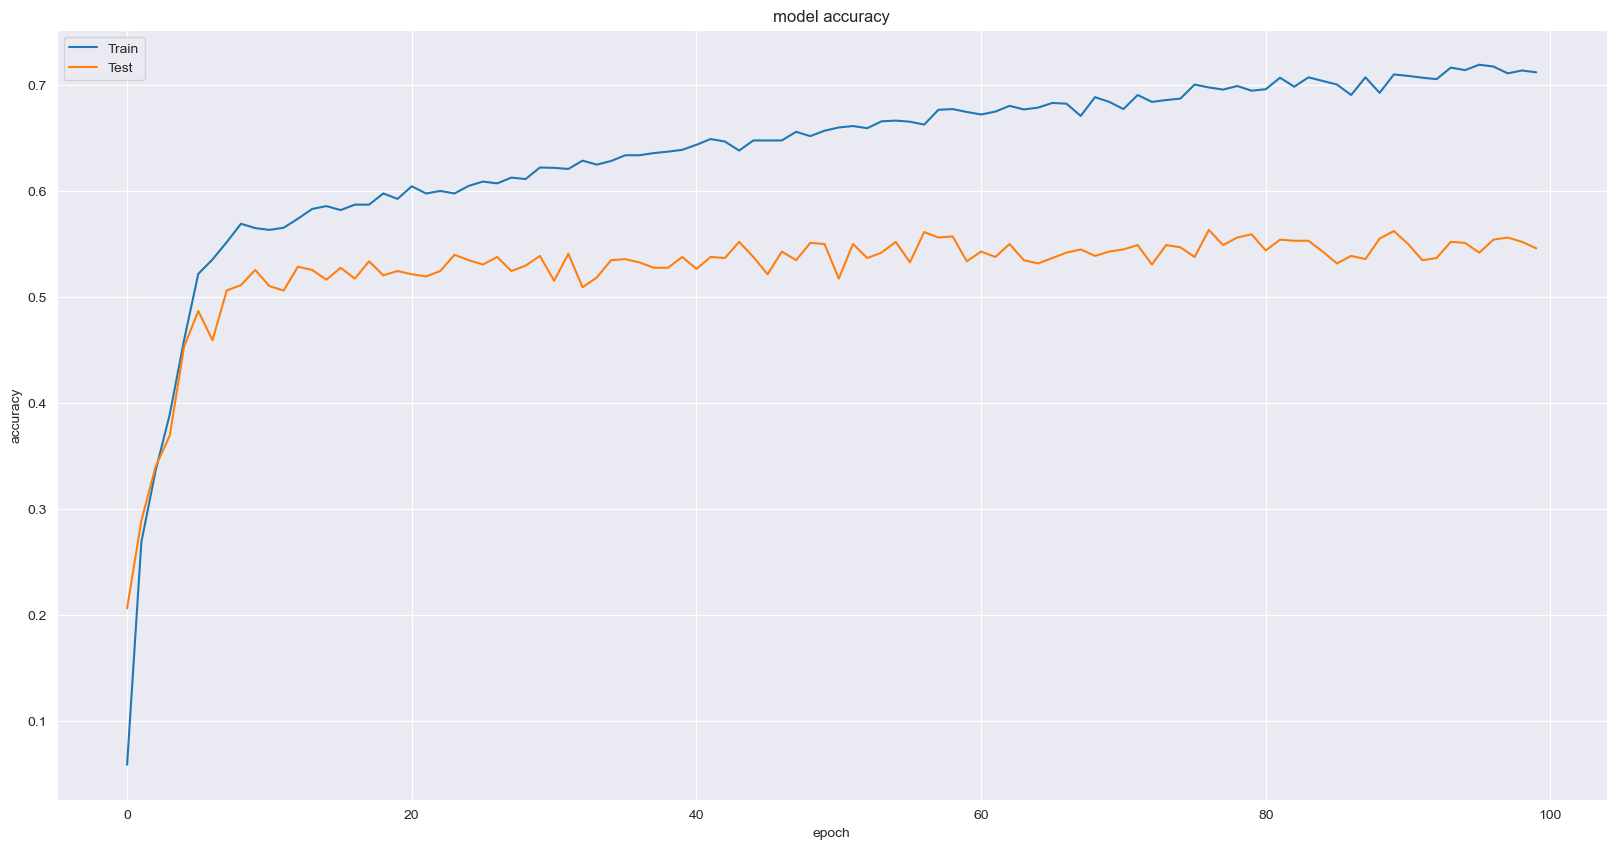

In [113]:
def my_plot(history):
    plt.figure(figsize=(20, 10))
    # plt.style.use("seaborn-paper")
    # summarize history for loss
    plt.plot(np.arange(len(history['training_loss'])),history['training_loss'])
    plt.plot(np.arange(len(history['training_loss'])),history['test_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
     # summarize history for accuracy
    plt.figure(figsize=(20, 10))
    plt.plot(np.arange(len(history['training_loss'])),history['training_acc'])
    plt.plot(np.arange(len(history['training_loss'])),history['test_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

my_plot(history)

In [115]:
# state_dict = model.state_dict()
# print(state_dict)

In [116]:
# torch.save(state_dict, "wine1.tar")

In [117]:
# # Load state dict from the disk (make sure it is the same name as above)
# state_dict = torch.load("wine1.tar")
#
# # Create a new model and load the state
# new_model = SimpleClassifier(num_inputs=11, num_hidden=16, num_outputs=1)
# new_model.load_state_dict(state_dict)
#
# # Verify that the parameters are the same
# print("Original model\n", model.cpu().state_dict())
# print("\nLoaded model\n", new_model.state_dict())

In [118]:
batch_size = 10
onnx_input = torch.randn(batch_size, 11)
expected_label = 6.
onnx_input

tensor([[ 7.8104e-01, -1.1388e+00,  1.4539e+00,  1.4327e+00,  1.3490e+00,
          1.2120e+00,  1.3449e+00,  6.2784e-01, -1.1074e+00, -9.5495e-01,
          1.5434e+00],
        [ 8.4001e-01, -6.1296e-01,  1.3169e+00, -2.8300e-01, -9.0971e-01,
         -1.9707e-01,  1.3744e-01,  3.1419e-01, -1.8691e+00,  1.0862e+00,
          1.1490e+00],
        [ 9.4598e-01, -3.8857e-01, -7.3215e-01, -9.5554e-02,  3.7564e-01,
         -1.5839e+00, -5.9517e-01,  1.2962e+00,  8.1438e-01,  2.3192e-01,
         -1.3249e+00],
        [ 9.0197e-01,  1.5882e+00, -3.0566e+00, -8.3554e-01,  9.0890e-01,
         -1.4633e+00, -4.4394e-01,  2.7861e-01, -1.0805e+00,  1.6053e-01,
          5.5237e-01],
        [ 1.2359e+00, -3.5484e-02, -1.0584e-01, -1.6350e+00,  9.2414e-01,
         -7.2527e-02,  1.3190e+00, -4.2883e-01,  4.7766e-01,  1.4048e+00,
          3.3357e-01],
        [-2.9683e-01,  3.1629e-01,  6.5385e-01, -6.4351e-01,  7.8456e-01,
         -1.8918e+00, -1.1084e+00,  1.1406e+00, -7.7765e-01, -5.7978e-0

In [119]:
input_names = df.columns[:-1]
output_names = df.columns[-1]
print(input_names, output_names)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object') quality


In [120]:
torch.onnx.export(model, onnx_input, 'wine_model.onnx', export_params=True, input_names=['input'], output_names=['output'], dynamic_axes={'input' : {0 : 'batch_size'}, 'output' : {0 : 'batch_size'}})